##### ===================================================================
### SISTEM PENDUKUNG KEPUTUSAN KELULUSAN MAHASISWA
#### MENGGUNAKAN FUZZY LOGIC (METODE MAMDANI)
#### UTS - SOFT COMPUTING
#### Nama Anggota Kelompok :
#### 1. Atha Habibi Gunanda - 202331197
#### 2. Hafizh Hilman Asyhari - 202331206
#### 3. Muhammad Randi Haryanda - 202331256
#### Dosen : Ir. Abdul Haris, S.Kom., M.Kom
#### Program Studi : S1 Teknik Informatika
#### Kelas : A
#### Tahun Ajar : 2025/2026
##### ===================================================================

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle
import seaborn as sns

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*70)
print("SISTEM PENDUKUNG KEPUTUSAN KELULUSAN MAHASISWA")
print("BERBASIS FUZZY LOGIC (METODE MAMDANI)")
print("="*70)

SISTEM PENDUKUNG KEPUTUSAN KELULUSAN MAHASISWA
BERBASIS FUZZY LOGIC (METODE MAMDANI)


In [2]:
# ===================================================================
# 1. DEFINISI VARIABEL LINGUISTIK
# ===================================================================

# Input Variables (Antecedents)
uas = ctrl.Antecedent(np.arange(0, 101, 1), 'Nilai_UAS')
absensi = ctrl.Antecedent(np.arange(0, 101, 1), 'Kehadiran')
tugas = ctrl.Antecedent(np.arange(0, 101, 1), 'Nilai_Tugas')

# Output Variable (Consequent)
kelulusan = ctrl.Consequent(np.arange(0, 101, 1), 'Tingkat_Kelulusan')

In [3]:
# ===================================================================
# 2. FUNGSI KEANGGOTAAN (MEMBERSHIP FUNCTIONS)
# ===================================================================

# Fungsi Keanggotaan untuk Nilai UAS
uas['BURUK'] = fuzz.trimf(uas.universe, [0, 0, 60])
uas['CUKUP'] = fuzz.trimf(uas.universe, [50, 70, 90])
uas['BAGUS'] = fuzz.trimf(uas.universe, [80, 100, 100])

# Fungsi Keanggotaan untuk Kehadiran
absensi['RENDAH'] = fuzz.trimf(absensi.universe, [0, 0, 70])
absensi['SEDANG'] = fuzz.trimf(absensi.universe, [60, 80, 95])
absensi['TINGGI'] = fuzz.trimf(absensi.universe, [85, 100, 100])

# Fungsi Keanggotaan untuk Nilai Tugas (VARIABEL BARU)
tugas['RENDAH'] = fuzz.trimf(tugas.universe, [0, 0, 65])
tugas['SEDANG'] = fuzz.trimf(tugas.universe, [55, 75, 90])
tugas['TINGGI'] = fuzz.trimf(tugas.universe, [80, 100, 100])

# Fungsi Keanggotaan untuk Tingkat Kelulusan (Output)
kelulusan['GAGAL'] = fuzz.trimf(kelulusan.universe, [0, 0, 50])
kelulusan['LULUS_SEDIKIT'] = fuzz.trimf(kelulusan.universe, [30, 60, 80])
kelulusan['LULUS_PASTI'] = fuzz.trimf(kelulusan.universe, [70, 100, 100])

print("\n✓ Variabel linguistik berhasil didefinisikan")
print("  - Input: Nilai UAS, Kehadiran, Nilai Tugas")
print("  - Output: Tingkat Kelulusan")


✓ Variabel linguistik berhasil didefinisikan
  - Input: Nilai UAS, Kehadiran, Nilai Tugas
  - Output: Tingkat Kelulusan


C:\Users\hafiz\AppData\Roaming\Python\Python313\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


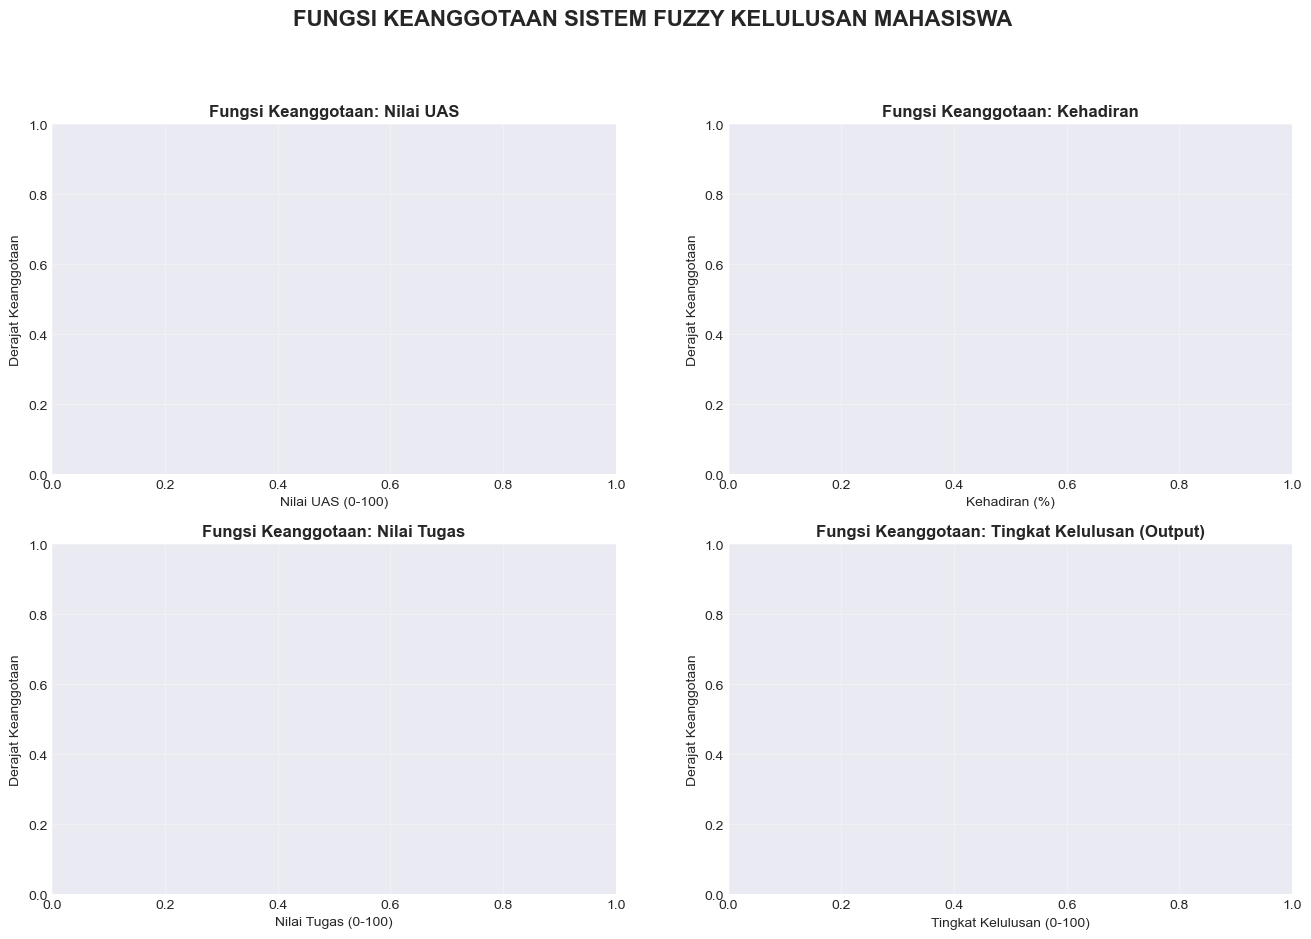

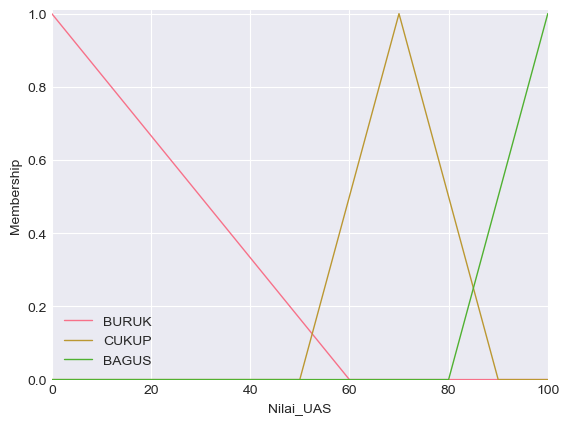

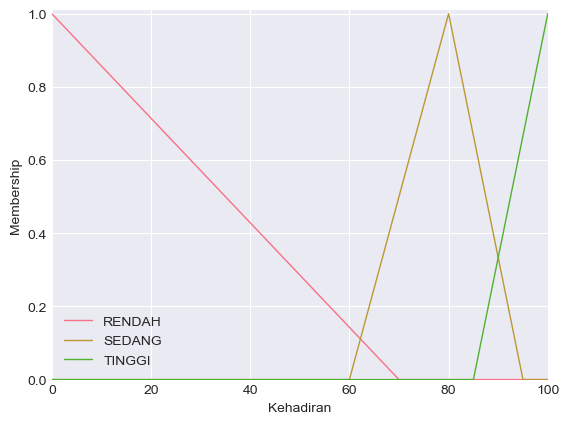

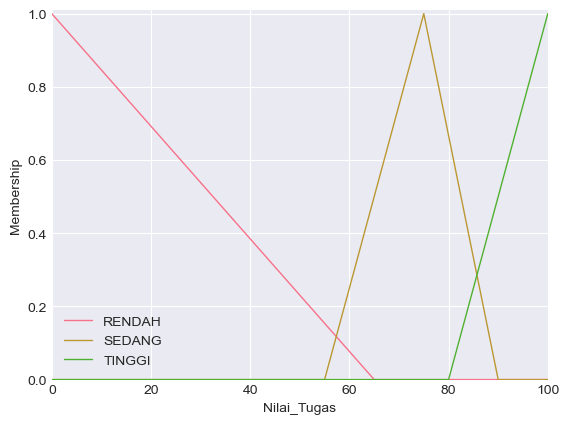

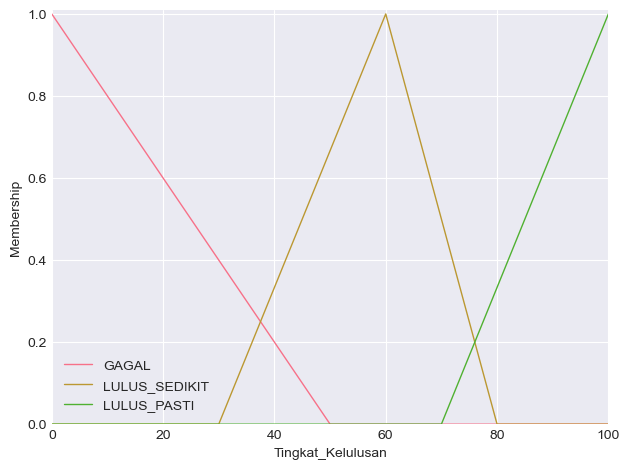


✓ Visualisasi fungsi keanggotaan berhasil ditampilkan


In [4]:
# ===================================================================
# 3. VISUALISASI FUNGSI KEANGGOTAAN
# ===================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('FUNGSI KEANGGOTAAN SISTEM FUZZY KELULUSAN MAHASISWA', 
             fontsize=16, fontweight='bold', y=0.995)

# Plot Nilai UAS
uas.view(ax=axes[0, 0])
axes[0, 0].set_title('Fungsi Keanggotaan: Nilai UAS', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Nilai UAS (0-100)', fontsize=10)
axes[0, 0].set_ylabel('Derajat Keanggotaan', fontsize=10)
axes[0, 0].legend(['Buruk', 'Cukup', 'Bagus'], loc='upper right')
axes[0, 0].grid(True, alpha=0.3)

# Plot Kehadiran
absensi.view(ax=axes[0, 1])
axes[0, 1].set_title('Fungsi Keanggotaan: Kehadiran', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Kehadiran (%)', fontsize=10)
axes[0, 1].set_ylabel('Derajat Keanggotaan', fontsize=10)
axes[0, 1].legend(['Rendah', 'Sedang', 'Tinggi'], loc='upper right')
axes[0, 1].grid(True, alpha=0.3)

# Plot Nilai Tugas
tugas.view(ax=axes[1, 0])
axes[1, 0].set_title('Fungsi Keanggotaan: Nilai Tugas', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Nilai Tugas (0-100)', fontsize=10)
axes[1, 0].set_ylabel('Derajat Keanggotaan', fontsize=10)
axes[1, 0].legend(['Rendah', 'Sedang', 'Tinggi'], loc='upper right')
axes[1, 0].grid(True, alpha=0.3)

# Plot Tingkat Kelulusan
kelulusan.view(ax=axes[1, 1])
axes[1, 1].set_title('Fungsi Keanggotaan: Tingkat Kelulusan (Output)', 
                     fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Tingkat Kelulusan (0-100)', fontsize=10)
axes[1, 1].set_ylabel('Derajat Keanggotaan', fontsize=10)
axes[1, 1].legend(['Gagal', 'Lulus Sedikit', 'Lulus Pasti'], loc='upper right')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Visualisasi fungsi keanggotaan berhasil ditampilkan")

In [5]:
# ===================================================================
# 4. PEMBENTUKAN ATURAN FUZZY (FUZZY RULES)
# ===================================================================

# Aturan Fuzzy diperluas dengan variabel Tugas
rules = [
    # Aturan untuk UAS BURUK
    ctrl.Rule(uas['BURUK'] & absensi['RENDAH'] & tugas['RENDAH'], kelulusan['GAGAL']),
    ctrl.Rule(uas['BURUK'] & absensi['RENDAH'] & tugas['SEDANG'], kelulusan['GAGAL']),
    ctrl.Rule(uas['BURUK'] & absensi['RENDAH'] & tugas['TINGGI'], kelulusan['GAGAL']),
    ctrl.Rule(uas['BURUK'] & absensi['SEDANG'] & tugas['RENDAH'], kelulusan['GAGAL']),
    ctrl.Rule(uas['BURUK'] & absensi['SEDANG'] & tugas['SEDANG'], kelulusan['GAGAL']),
    ctrl.Rule(uas['BURUK'] & absensi['SEDANG'] & tugas['TINGGI'], kelulusan['LULUS_SEDIKIT']),
    ctrl.Rule(uas['BURUK'] & absensi['TINGGI'] & tugas['RENDAH'], kelulusan['GAGAL']),
    ctrl.Rule(uas['BURUK'] & absensi['TINGGI'] & tugas['SEDANG'], kelulusan['LULUS_SEDIKIT']),
    ctrl.Rule(uas['BURUK'] & absensi['TINGGI'] & tugas['TINGGI'], kelulusan['LULUS_SEDIKIT']),
    
    # Aturan untuk UAS CUKUP
    ctrl.Rule(uas['CUKUP'] & absensi['RENDAH'] & tugas['RENDAH'], kelulusan['GAGAL']),
    ctrl.Rule(uas['CUKUP'] & absensi['RENDAH'] & tugas['SEDANG'], kelulusan['GAGAL']),
    ctrl.Rule(uas['CUKUP'] & absensi['RENDAH'] & tugas['TINGGI'], kelulusan['LULUS_SEDIKIT']),
    ctrl.Rule(uas['CUKUP'] & absensi['SEDANG'] & tugas['RENDAH'], kelulusan['LULUS_SEDIKIT']),
    ctrl.Rule(uas['CUKUP'] & absensi['SEDANG'] & tugas['SEDANG'], kelulusan['LULUS_SEDIKIT']),
    ctrl.Rule(uas['CUKUP'] & absensi['SEDANG'] & tugas['TINGGI'], kelulusan['LULUS_PASTI']),
    ctrl.Rule(uas['CUKUP'] & absensi['TINGGI'] & tugas['RENDAH'], kelulusan['LULUS_SEDIKIT']),
    ctrl.Rule(uas['CUKUP'] & absensi['TINGGI'] & tugas['SEDANG'], kelulusan['LULUS_PASTI']),
    ctrl.Rule(uas['CUKUP'] & absensi['TINGGI'] & tugas['TINGGI'], kelulusan['LULUS_PASTI']),
    
    # Aturan untuk UAS BAGUS
    ctrl.Rule(uas['BAGUS'] & absensi['RENDAH'] & tugas['RENDAH'], kelulusan['LULUS_SEDIKIT']),
    ctrl.Rule(uas['BAGUS'] & absensi['RENDAH'] & tugas['SEDANG'], kelulusan['LULUS_SEDIKIT']),
    ctrl.Rule(uas['BAGUS'] & absensi['RENDAH'] & tugas['TINGGI'], kelulusan['LULUS_PASTI']),
    ctrl.Rule(uas['BAGUS'] & absensi['SEDANG'] & tugas['RENDAH'], kelulusan['LULUS_SEDIKIT']),
    ctrl.Rule(uas['BAGUS'] & absensi['SEDANG'] & tugas['SEDANG'], kelulusan['LULUS_PASTI']),
    ctrl.Rule(uas['BAGUS'] & absensi['SEDANG'] & tugas['TINGGI'], kelulusan['LULUS_PASTI']),
    ctrl.Rule(uas['BAGUS'] & absensi['TINGGI'] & tugas['RENDAH'], kelulusan['LULUS_PASTI']),
    ctrl.Rule(uas['BAGUS'] & absensi['TINGGI'] & tugas['SEDANG'], kelulusan['LULUS_PASTI']),
    ctrl.Rule(uas['BAGUS'] & absensi['TINGGI'] & tugas['TINGGI'], kelulusan['LULUS_PASTI']),
]

# Membuat Sistem Kontrol dan Simulasi
kelulusan_ctrl = ctrl.ControlSystem(rules)
kelulusan_sim = ctrl.ControlSystemSimulation(kelulusan_ctrl)

print(f"\n✓ Sistem fuzzy berhasil dibuat dengan {len(rules)} aturan")



✓ Sistem fuzzy berhasil dibuat dengan 27 aturan


In [6]:
# ===================================================================
# 5. SIMULASI DENGAN MULTIPLE MAHASISWA
# ===================================================================

# Data mahasiswa untuk simulasi
mahasiswa_data = {
    'Nama': ['Mahasiswa A', 'Mahasiswa B', 'Mahasiswa C', 'Mahasiswa D', 
             'Mahasiswa E', 'Mahasiswa F', 'Mahasiswa G', 'Mahasiswa H'],
    'UAS': [90, 55, 75, 45, 85, 70, 60, 95],
    'Kehadiran': [60, 95, 75, 50, 90, 85, 70, 98],
    'Tugas': [70, 85, 80, 40, 88, 75, 65, 92]
}

df_mahasiswa = pd.DataFrame(mahasiswa_data)

# Proses prediksi untuk setiap mahasiswa
hasil_kelulusan = []

print("\n" + "="*70)
print("HASIL SIMULASI KELULUSAN MAHASISWA")
print("="*70)

for idx, row in df_mahasiswa.iterrows():
    kelulusan_sim.input['Nilai_UAS'] = row['UAS']
    kelulusan_sim.input['Kehadiran'] = row['Kehadiran']
    kelulusan_sim.input['Nilai_Tugas'] = row['Tugas']
    
    kelulusan_sim.compute()
    tingkat_kelulusan = kelulusan_sim.output['Tingkat_Kelulusan']
    hasil_kelulusan.append(tingkat_kelulusan)
    
    # Tentukan status kelulusan
    if tingkat_kelulusan < 40:
        status = "GAGAL ❌"
    elif tingkat_kelulusan < 70:
        status = "LULUS BERSYARAT ⚠️"
    else:
        status = "LULUS ✓"
    
    print(f"\n{row['Nama']}:")
    print(f"  • Nilai UAS    : {row['UAS']}")
    print(f"  • Kehadiran    : {row['Kehadiran']}%")
    print(f"  • Nilai Tugas  : {row['Tugas']}")
    print(f"  • Tingkat Kelulusan: {tingkat_kelulusan:.2f}")
    print(f"  • Status       : {status}")

df_mahasiswa['Tingkat_Kelulusan'] = hasil_kelulusan
df_mahasiswa['Status'] = df_mahasiswa['Tingkat_Kelulusan'].apply(
    lambda x: 'GAGAL' if x < 40 else ('LULUS BERSYARAT' if x < 70 else 'LULUS')
)


HASIL SIMULASI KELULUSAN MAHASISWA

Mahasiswa A:
  • Nilai UAS    : 90
  • Kehadiran    : 60%
  • Nilai Tugas  : 70
  • Tingkat Kelulusan: 55.35
  • Status       : LULUS BERSYARAT ⚠️

Mahasiswa B:
  • Nilai UAS    : 55
  • Kehadiran    : 95%
  • Nilai Tugas  : 85
  • Tingkat Kelulusan: 74.81
  • Status       : LULUS ✓

Mahasiswa C:
  • Nilai UAS    : 75
  • Kehadiran    : 75%
  • Nilai Tugas  : 80
  • Tingkat Kelulusan: 56.39
  • Status       : LULUS BERSYARAT ⚠️

Mahasiswa D:
  • Nilai UAS    : 45
  • Kehadiran    : 50%
  • Nilai Tugas  : 40
  • Tingkat Kelulusan: 22.02
  • Status       : GAGAL ❌

Mahasiswa E:
  • Nilai UAS    : 85
  • Kehadiran    : 90%
  • Nilai Tugas  : 88
  • Tingkat Kelulusan: 71.19
  • Status       : LULUS ✓

Mahasiswa F:
  • Nilai UAS    : 70
  • Kehadiran    : 85%
  • Nilai Tugas  : 75
  • Tingkat Kelulusan: 56.39
  • Status       : LULUS BERSYARAT ⚠️

Mahasiswa G:
  • Nilai UAS    : 60
  • Kehadiran    : 70%
  • Nilai Tugas  : 65
  • Tingkat Kelulusan: 56.11

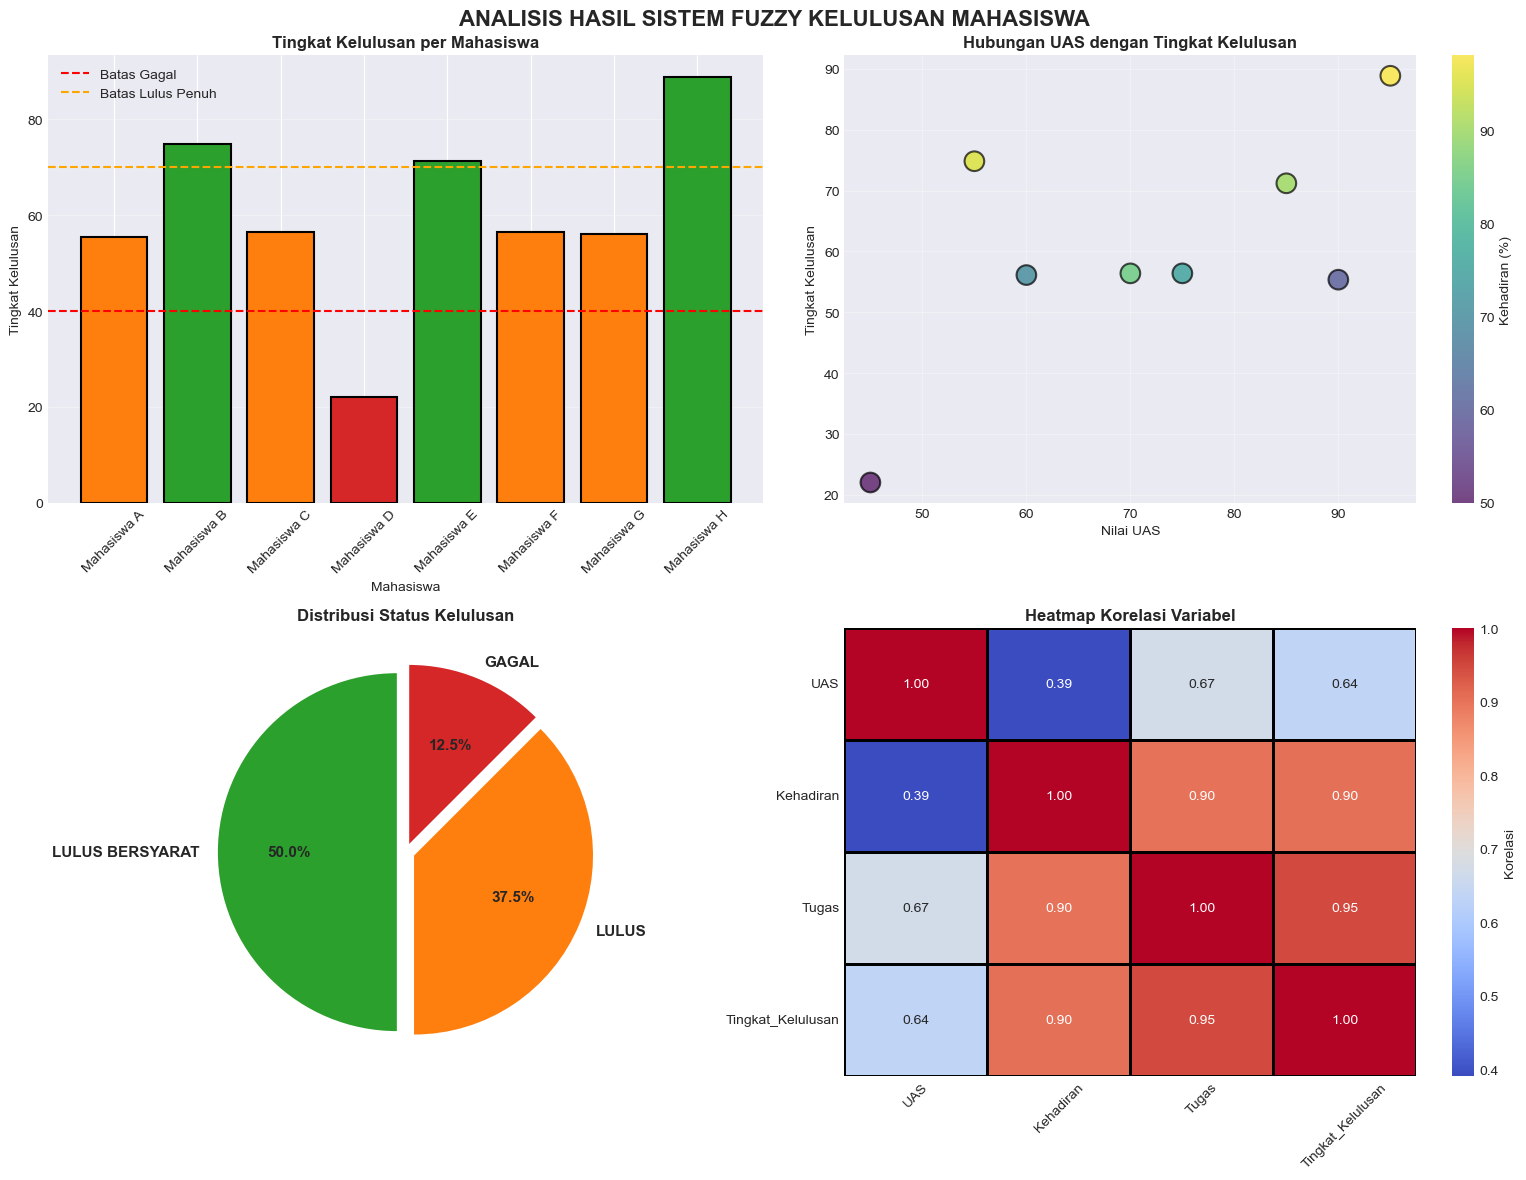

In [7]:
# ===================================================================
# 6. VISUALISASI HASIL SIMULASI
# ===================================================================

# Grafik 1: Bar Chart Tingkat Kelulusan
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ANALISIS HASIL SISTEM FUZZY KELULUSAN MAHASISWA', 
             fontsize=16, fontweight='bold')

# Bar Chart
colors = ['#d62728' if x < 40 else ('#ff7f0e' if x < 70 else '#2ca02c') 
          for x in df_mahasiswa['Tingkat_Kelulusan']]
axes[0, 0].bar(df_mahasiswa['Nama'], df_mahasiswa['Tingkat_Kelulusan'], 
               color=colors, edgecolor='black', linewidth=1.5)
axes[0, 0].axhline(y=40, color='red', linestyle='--', label='Batas Gagal')
axes[0, 0].axhline(y=70, color='orange', linestyle='--', label='Batas Lulus Penuh')
axes[0, 0].set_title('Tingkat Kelulusan per Mahasiswa', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Mahasiswa', fontsize=10)
axes[0, 0].set_ylabel('Tingkat Kelulusan', fontsize=10)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].tick_params(axis='x', rotation=45)

# Grafik 2: Scatter Plot UAS vs Tingkat Kelulusan
scatter = axes[0, 1].scatter(df_mahasiswa['UAS'], df_mahasiswa['Tingkat_Kelulusan'], 
                             s=200, c=df_mahasiswa['Kehadiran'], cmap='viridis', 
                             edgecolor='black', linewidth=1.5, alpha=0.7)
axes[0, 1].set_title('Hubungan UAS dengan Tingkat Kelulusan', 
                     fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Nilai UAS', fontsize=10)
axes[0, 1].set_ylabel('Tingkat Kelulusan', fontsize=10)
axes[0, 1].grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=axes[0, 1])
cbar.set_label('Kehadiran (%)', fontsize=10)

# Grafik 3: Pie Chart Status Kelulusan
status_counts = df_mahasiswa['Status'].value_counts()
colors_pie = ['#2ca02c', '#ff7f0e', '#d62728']
axes[1, 0].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%',
               colors=colors_pie, startangle=90, explode=[0.05]*len(status_counts),
               textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1, 0].set_title('Distribusi Status Kelulusan', fontweight='bold', fontsize=12)

# Grafik 4: Heatmap Korelasi
correlation_data = df_mahasiswa[['UAS', 'Kehadiran', 'Tugas', 'Tingkat_Kelulusan']].corr()
sns.heatmap(correlation_data, annot=True, fmt='.2f', cmap='coolwarm', 
            ax=axes[1, 1], cbar_kws={'label': 'Korelasi'}, 
            linewidths=1, linecolor='black')
axes[1, 1].set_title('Heatmap Korelasi Variabel', fontweight='bold', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

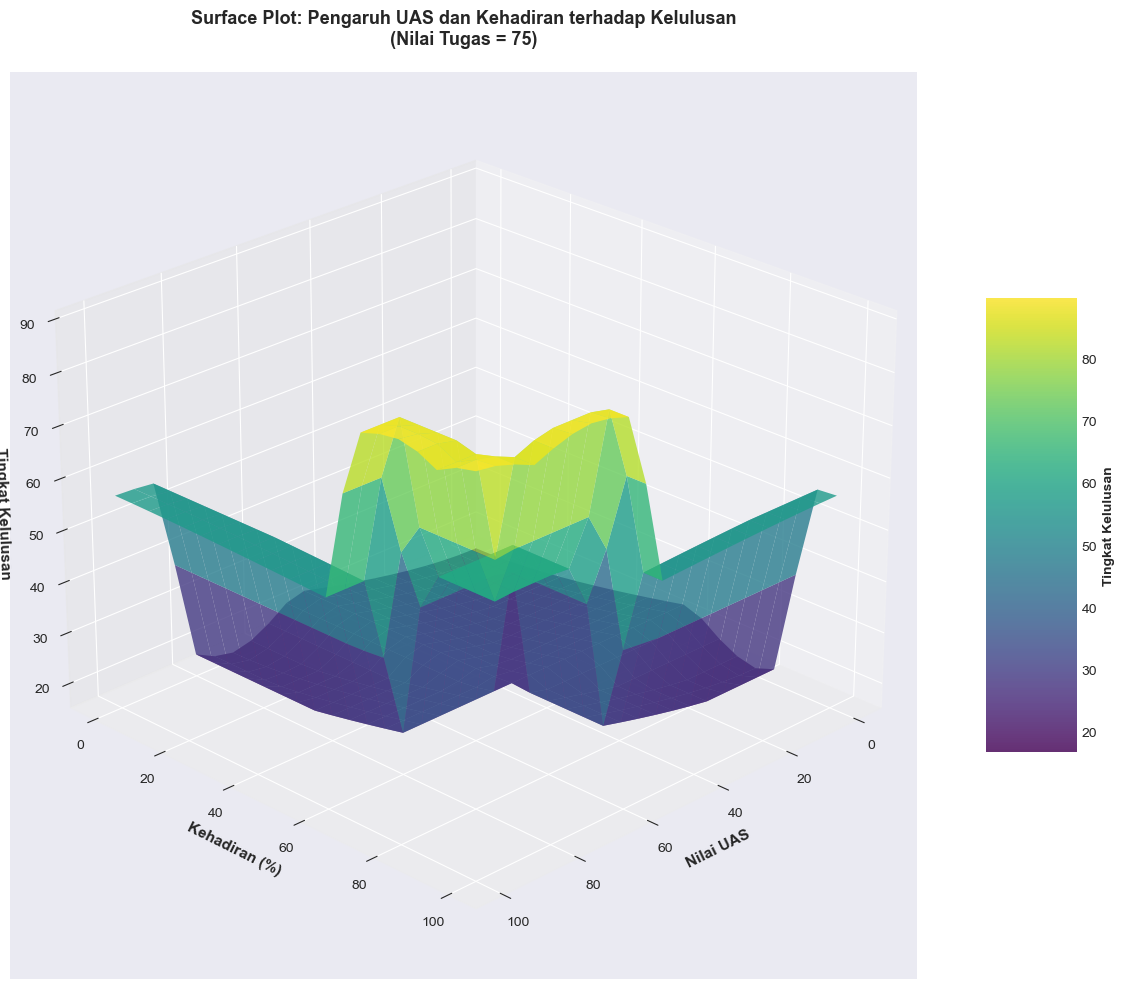

In [8]:
# ===================================================================
# 7. SURFACE PLOT 3D (UAS vs Kehadiran vs Kelulusan)
# ===================================================================

from mpl_toolkits.mplot3d import Axes3D

# Generate data untuk surface plot
uas_range = np.arange(0, 101, 5)
kehadiran_range = np.arange(0, 101, 5)
uas_grid, kehadiran_grid = np.meshgrid(uas_range, kehadiran_range)
kelulusan_grid = np.zeros_like(uas_grid, dtype=float)

# Hitung tingkat kelulusan untuk setiap kombinasi
for i in range(uas_grid.shape[0]):
    for j in range(uas_grid.shape[1]):
        kelulusan_sim.input['Nilai_UAS'] = uas_grid[i, j]
        kelulusan_sim.input['Kehadiran'] = kehadiran_grid[i, j]
        kelulusan_sim.input['Nilai_Tugas'] = 75  # Nilai tugas konstan
        kelulusan_sim.compute()
        kelulusan_grid[i, j] = kelulusan_sim.output['Tingkat_Kelulusan']

# Plot 3D Surface
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(uas_grid, kehadiran_grid, kelulusan_grid, 
                       cmap='viridis', alpha=0.8, edgecolor='none')

ax.set_xlabel('Nilai UAS', fontsize=11, fontweight='bold')
ax.set_ylabel('Kehadiran (%)', fontsize=11, fontweight='bold')
ax.set_zlabel('Tingkat Kelulusan', fontsize=11, fontweight='bold')
ax.set_title('Surface Plot: Pengaruh UAS dan Kehadiran terhadap Kelulusan\n(Nilai Tugas = 75)', 
             fontsize=13, fontweight='bold', pad=20)

cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Tingkat Kelulusan', fontsize=10, fontweight='bold')

ax.view_init(elev=25, azim=45)
plt.tight_layout()
plt.show()

In [9]:
# ===================================================================
# 8. TABEL HASIL LENGKAP
# ===================================================================

print("\n" + "="*70)
print("TABEL RINGKASAN HASIL SIMULASI")
print("="*70)
print(df_mahasiswa.to_string(index=False))


TABEL RINGKASAN HASIL SIMULASI
       Nama  UAS  Kehadiran  Tugas  Tingkat_Kelulusan          Status
Mahasiswa A   90         60     70          55.347985 LULUS BERSYARAT
Mahasiswa B   55         95     85          74.814815           LULUS
Mahasiswa C   75         75     80          56.388889 LULUS BERSYARAT
Mahasiswa D   45         50     40          22.023810           GAGAL
Mahasiswa E   85         90     88          71.190018           LULUS
Mahasiswa F   70         85     75          56.388889 LULUS BERSYARAT
Mahasiswa G   60         70     65          56.111111 LULUS BERSYARAT
Mahasiswa H   95         98     92          88.857143           LULUS


In [10]:
# ===================================================================
# 9. STATISTIK DESKRIPTIF
# ===================================================================

print("\n" + "="*70)
print("STATISTIK DESKRIPTIF")
print("="*70)
print(df_mahasiswa[['UAS', 'Kehadiran', 'Tugas', 'Tingkat_Kelulusan']].describe())

print("\n" + "="*70)
print("SISTEM FUZZY LOGIC BERHASIL DIJALANKAN!")
print("="*70)
print("\n📊 Visualisasi lengkap telah ditampilkan")
print("📈 Analisis korelasi dan surface plot tersedia")
print("="*70)



STATISTIK DESKRIPTIF
            UAS  Kehadiran      Tugas  Tingkat_Kelulusan
count   8.00000   8.000000   8.000000           8.000000
mean   71.87500  77.875000  74.375000          60.140332
std    17.71551  17.166724  16.604109          19.575161
min    45.00000  50.000000  40.000000          22.023810
25%    58.75000  67.500000  68.750000          55.920330
50%    72.50000  80.000000  77.500000          56.388889
75%    86.25000  91.250000  85.750000          72.096217
max    95.00000  98.000000  92.000000          88.857143

SISTEM FUZZY LOGIC BERHASIL DIJALANKAN!

📊 Visualisasi lengkap telah ditampilkan
📈 Analisis korelasi dan surface plot tersedia
